In [61]:
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas 
import squarify
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go 
import plotly.figure_factory as ff
import seaborn as sns
plt.rcdefaults()
%matplotlib inline
squarify.plot?

In [62]:
death_case = pd.read_csv(
    '/Users/zhangsuming/Documents/CIS241/CIS241proj.csv',
    parse_dates=['date'])
death_case.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [64]:
death_state = death_case.groupby('state').size().reset_index(name='counts')
death_city = death_case.groupby(['state', 'city']).size().reset_index(name='counts')
death_case["date"] = pd.to_datetime(death_case["date"])
death_case["weekday"] = death_case["date"].dt.weekday
death_case['month'] = death_case['date'].dt.month
death_case['month_day'] = death_case['date'].dt.day
death_case['year'] = death_case['date'].dt.year
death_case['month_year'] = pd.to_datetime(death_case['date']).dt.to_period('M')
death_city

,state,city,counts
0,AK,Achorage,1
1,AK,Anchor Point,1
2,AK,Anchorage,7
3,AK,Barrow,1
4,AK,Big Lake,1
...,...,...,...
2560,WY,Cheyenne,2
2561,WY,Douglas,2
2562,WY,Gillette,1
2563,WY,Laramie,2


In [65]:
fig = px.choropleth(death_state,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="counts",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states',
                    color_continuous_scale="burg") # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [66]:
fig = px.treemap(death_state, path = [px.Constant('the United States') , 'state'] , values = death_state['counts'] , color = death_state['counts'],color_continuous_scale='matter')
pyo.plot(fig)

'temp-plot.html'

In [67]:
fig = px.treemap(death_city, path = [px.Constant('Tree map group by city') , 'city'] , values = death_city['counts'] , color = death_city['counts'],color_continuous_scale='amp')
pyo.plot(fig)

'temp-plot.html'

In [68]:
fig = px.treemap(death_city, path = [px.Constant('the United States') , 'state','city'] , values = death_city['counts'] , color = death_city['counts'],color_continuous_scale='speed')
pyo.plot(fig)

'temp-plot.html'

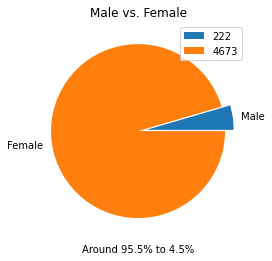

In [28]:
gender_percent = death_case.groupby('gender')['gender'].count()
#(gender) is the value we want to show in the pie chart 
#[gender] is the value to take in the pie chart
explode = (0.1, 0)
labels='Male','Female'

plt.title('Male vs. Female')
plt.xlabel('Around 95.5% to 4.5%')

gender_percent.plot(kind = 'pie', explode = explode, labels= labels)
# Add a legend to the plot
plt.ylabel(' ')
plt.legend(loc = 'upper right', 
           labels = gender_percent.values)
plt.show()

In [70]:
'''data = death_case['gender'].value_counts().reset_index()

data.columns = [
    'gender', 
    'count'
]

fig = px.bar(
    data, 
    values='count', 
    names='gender',  
    title='Race distribution', 
    width=500, 
    height=500
)
'''
data = death_case['gender'].value_counts().reset_index() #reset the integer to zero

data.columns = [
    'gender', 
    'count'
]

data = data.sort_values('count')

fig = px.bar(
    data,
    color= 'gender',
    x='gender', 
    y='count', 
    orientation='v', 
    title='Gender distribution', 
    width=600,
    height=600
)

fig.show()

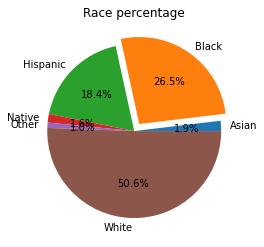

In [7]:
data = death_case['race'].value_counts().reset_index()

data.columns = [
    'race', 
    'count'
]

fig = px.pie(
    data, 
    values='count', 
    names='race', 
    title='race', 
    width=500, 
    height=500
)

fig.show()


In [32]:
data = death_case['race'].value_counts().reset_index()

data.columns = [
    'race', 
    'count'
]

fig = px.pie(
    data, 
    values='count', 
    names='race',  
    title='Race distribution', 
    width=500, 
    height=500
)

fig.show()

In [60]:
mean_age = death_case['age'].mean()
median_Age = death_case['age'].median()
min_Age=death_case['age'].min()
max_Age=death_case['age'].max()
print(mean_age,median_Age,max_Age,min_Age)

36.54974956619011 35.0 91.0 6.0


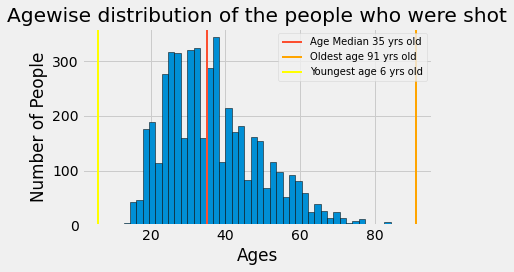

In [40]:
plt.style.use('fivethirtyeight')

#data = pd.read_csv('data.csv')
#ids = death_case['Responder_id']
ages = death_case['age']

#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.hist(ages, bins=50, edgecolor='black')

median_age = median_Age
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median 35 yrs old', linewidth=2)
plt.axvline(max_Age, color='Orange', label='Oldest age 91 yrs old', linewidth=2)
plt.axvline(min_Age, color='Yellow', label='Youngest age 6 yrs old', linewidth=2)
plt.legend(loc = 'upper right', prop={'size': 10})

plt.title('Agewise distribution of the people who were shot')
plt.xlabel('Ages')
plt.ylabel('Number of People')

plt.tight_layout()

plt.show()

In [35]:
fig = px.histogram(
    death_case, 
    "age", 
    nbins=80, 
    title ='Age distribution', 
    width=800,
    height=500
)

fig.show()

In [21]:
fig = go.Figure(
    data=go.Violin(
        y=death_case['age'], 
        x0='Age'
    )
)

fig.show()

In [41]:
data = death_case.groupby(['month_year'])['name'].count().reset_index()

data.columns = [
    'month_year', 
    'count'
]

data['month_year'] = data['month_year'].astype(str)
data = data.head(65)

fig = px.line(
    data, 
    x="month_year", 
    y="count", 
    title='Deaths month by month'
)

fig.show()

In [29]:
data = death_case.groupby(['year'])['name'].count().reset_index()

data.columns = [
    'year', 
    'count'
]

fig = px.bar(
    data, 
    color='year',
    x='year', 
    y='count',
    orientation='v', 
    title='Year', 
    width=600
)

fig.show()

In [71]:
data = death_case['armed'].value_counts().reset_index()

data.columns = [
    'armed', 
    'count'
]

data = data.sort_values('count')

fig = px.pie(
    data, 
    values='count', 
    names='armed', 
    title='Weapon', 
    width=600, 
    height=600
)

fig.show()
